In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings
from scipy.stats.stats import ttest_ind


warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifeexp = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

First, load the dataset.

Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.


In [3]:
lifeexp.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
lifeexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
len(lifeexp)

2938

In [6]:
lifeexp.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
lifeexp.isnull().sum()*100/lifeexp.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [8]:
# remove unecessary spaces of column names
lifeexp.columns = lifeexp.columns.str.replace(' ', '')
# remove starnge signs
lifeexp.columns = lifeexp.columns.str.replace('-', '_')

In [9]:
lifeexp.isnull().sum()*100/lifeexp.isnull().count()

Country                          0.000000
Year                             0.000000
Status                           0.000000
Lifeexpectancy                   0.340368
AdultMortality                   0.340368
infantdeaths                     0.000000
Alcohol                          6.603131
percentageexpenditure            0.000000
HepatitisB                      18.822328
Measles                          0.000000
BMI                              1.157250
under_fivedeaths                 0.000000
Polio                            0.646698
Totalexpenditure                 7.692308
Diphtheria                       0.646698
HIV/AIDS                         0.000000
GDP                             15.248468
Population                      22.191967
thinness1_19years                1.157250
thinness5_9years                 1.157250
Incomecompositionofresources     5.684139
Schooling                        5.547992
dtype: float64

In [10]:
# fill in missing of data
# since this dataset are time wise dataset, so it's good to use interpolation to fill in missing values
column_list = ['Lifeexpectancy','AdultMortality','infantdeaths','Alcohol','percentageexpenditure',
              'HepatitisB','Measles','BMI','under_fivedeaths','Polio','Totalexpenditure','Diphtheria','HIV/AIDS','GDP','Population',
               'thinness1_19years','thinness5_9years','Incomecompositionofresources','Schooling']
countries = lifeexp['Country'].unique()
for country in countries:
    lifeexp.loc[lifeexp['Country']== country,column_list] = lifeexp.loc[lifeexp['Country']==country,column_list].interpolate(method='linear',limit_direction='forward')

lifeexp.dropna(inplace=True)

# check if the dataset change or not after apply interpolation

In [11]:
lifeexp.isnull().sum()*100/lifeexp.isnull().count()

Country                         0.0
Year                            0.0
Status                          0.0
Lifeexpectancy                  0.0
AdultMortality                  0.0
infantdeaths                    0.0
Alcohol                         0.0
percentageexpenditure           0.0
HepatitisB                      0.0
Measles                         0.0
BMI                             0.0
under_fivedeaths                0.0
Polio                           0.0
Totalexpenditure                0.0
Diphtheria                      0.0
HIV/AIDS                        0.0
GDP                             0.0
Population                      0.0
thinness1_19years               0.0
thinness5_9years                0.0
Incomecompositionofresources    0.0
Schooling                       0.0
dtype: float64

In [12]:
lifeexp_num=lifeexp.iloc[:,3:]
print(lifeexp_num)

      Lifeexpectancy  AdultMortality  infantdeaths  Alcohol  \
0               65.0           263.0            62     0.01   
1               59.9           271.0            64     0.01   
2               59.9           268.0            66     0.01   
3               59.5           272.0            69     0.01   
4               59.2           275.0            71     0.01   
5               58.8           279.0            74     0.01   
6               58.6           281.0            77     0.01   
7               58.1           287.0            80     0.03   
8               57.5           295.0            82     0.02   
9               57.3           295.0            84     0.03   
10              57.3           291.0            85     0.02   
11              57.0           293.0            87     0.02   
12              56.7           295.0            87     0.01   
13              56.2             3.0            88     0.01   
14              55.3           316.0            88     

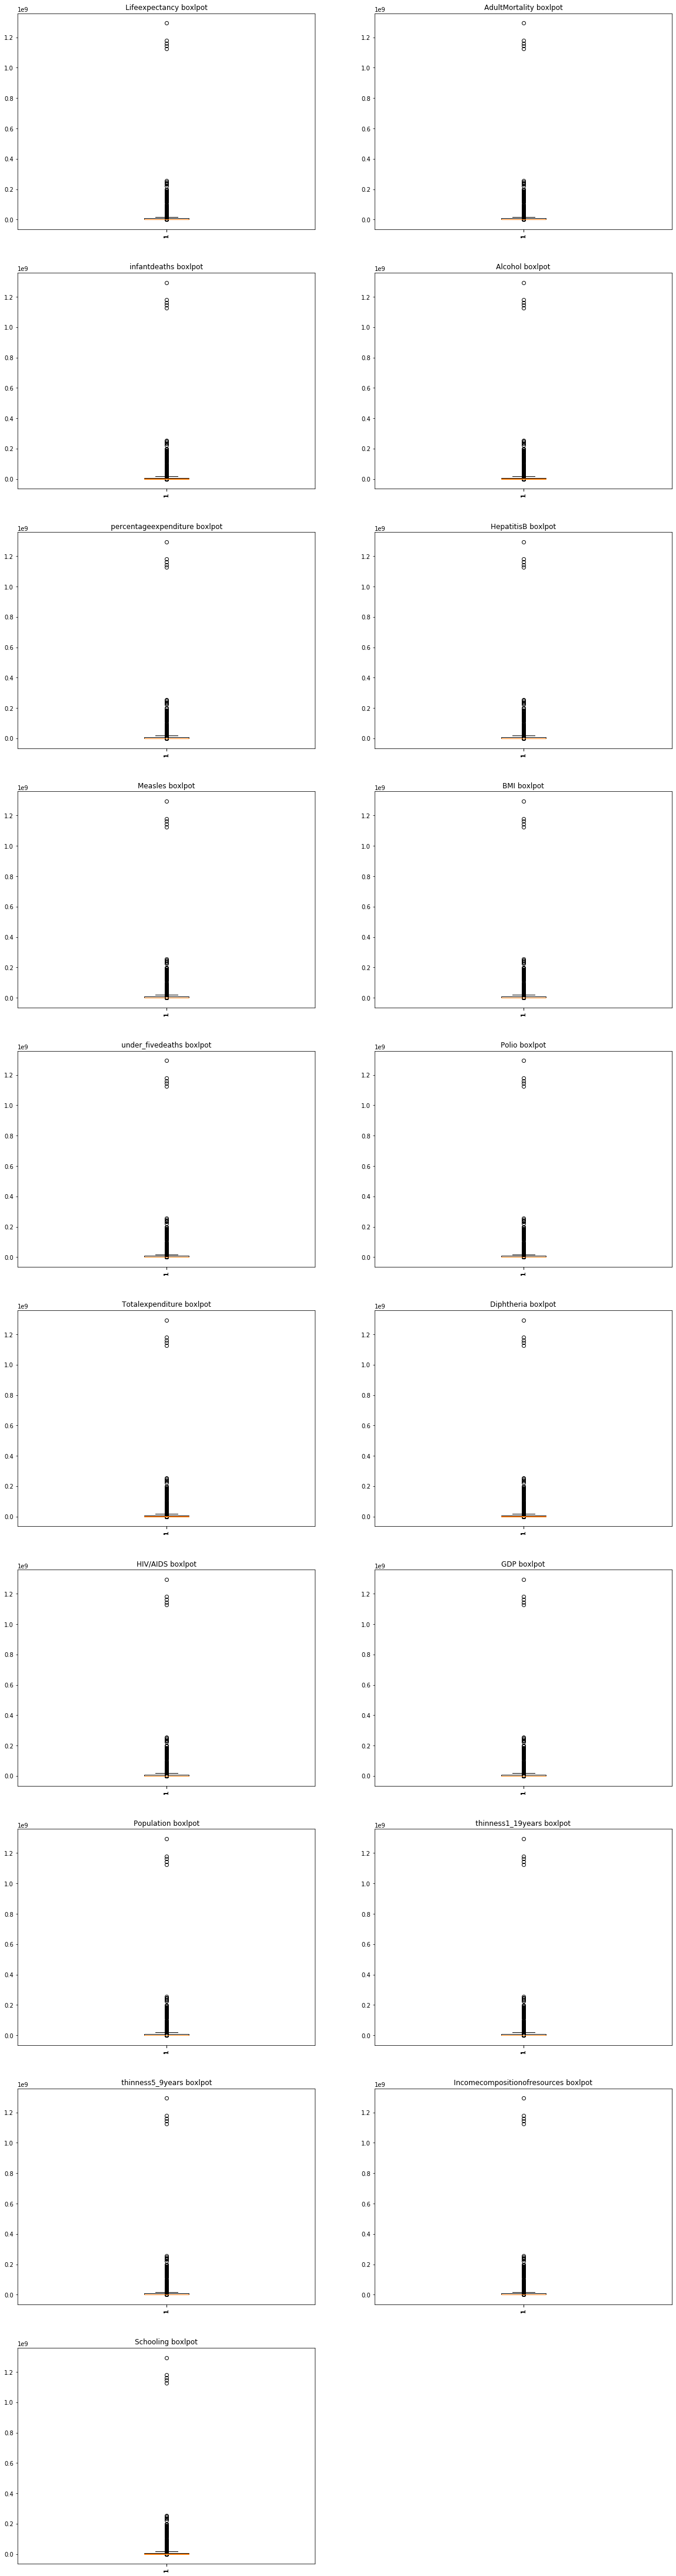

In [13]:
# find out if there are outliers for each column
# plot boxplot for each column
column_list = ['Lifeexpectancy','AdultMortality','infantdeaths','Alcohol','percentageexpenditure',
              'HepatitisB','Measles','BMI','under_fivedeaths','Polio','Totalexpenditure','Diphtheria',
               'HIV/AIDS','GDP','Population', 'thinness1_19years','thinness5_9years','Incomecompositionofresources',
               'Schooling']
fig=plt.figure(figsize=(20,80))
lifeexp_num=lifeexp.iloc[:,3:]

for i in range(len(column_list)):
    for j, var in enumerate(column_list):
        ax = plt.subplot(10,2,1*j+1)
        ax.boxplot(lifeexp_num.iloc[:,i])  
        #ax.set_xlim(-0.5, 15.5)
        ax.set_title("{} boxlpot".format(var))
        plt.xticks(rotation="vertical")
plt.show()


# it's clear to see below, all columns in the plot have outliers
# so remove outliers next step

# maybe should apply Tukey method for calculate percentage of outlers

In [14]:
# remove outliers
# winzorize it
# it's clear to see almost all the outliers are above the higher range of that column data values
# so remove the outleirs by the higher range only for all columns
lifeexp_win=lifeexp
for var in column_list:
    lifeexp_win[var] = winsorize(lifeexp[var], (0.05,0.15))
    # two for loop
    # another loop remove rest

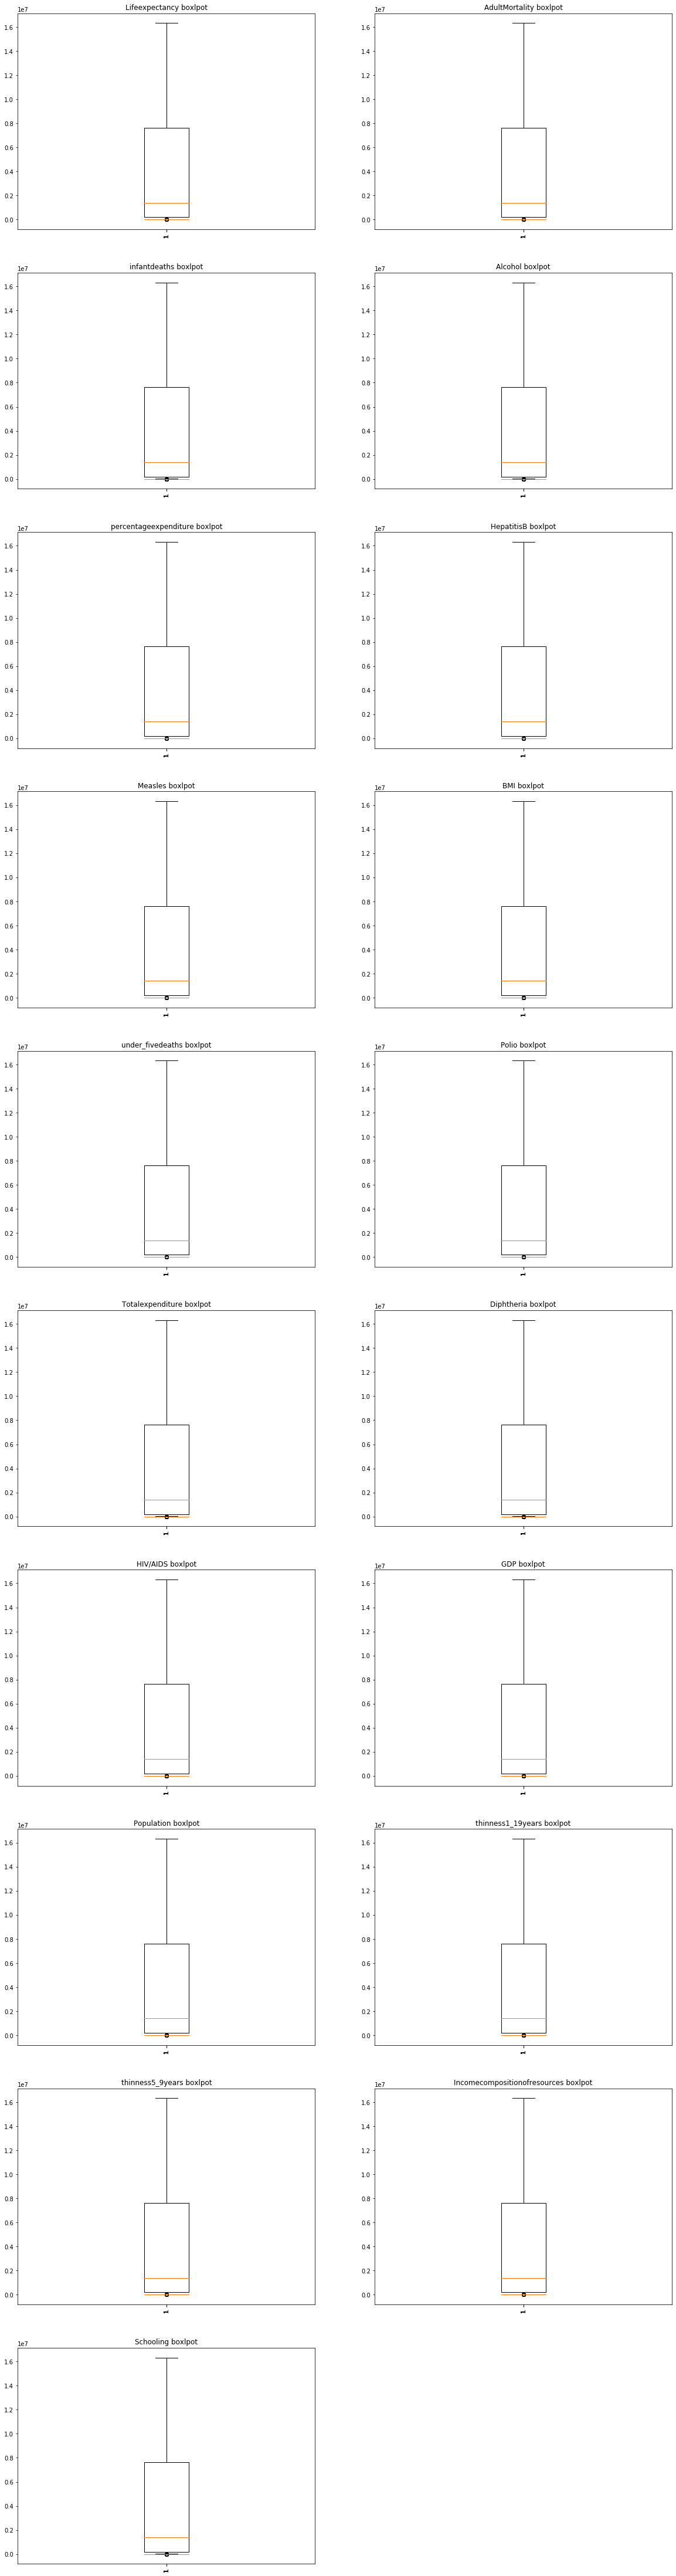

In [15]:
# plot again using winzroized version
column_list = ['Lifeexpectancy','AdultMortality','infantdeaths','Alcohol','percentageexpenditure',
              'HepatitisB','Measles','BMI','under_fivedeaths','Polio','Totalexpenditure','Diphtheria',
               'HIV/AIDS','GDP','Population', 'thinness1_19years','thinness5_9years','Incomecompositionofresources',
               'Schooling']
fig=plt.figure(figsize=(20,80))
lifeexp_num_win=lifeexp_win.iloc[:,3:]

for i in range(len(column_list)):
    for j, var in enumerate(column_list):
        ax = plt.subplot(10,2,1*j+1)
        ax.boxplot(lifeexp_num_win.iloc[:,i])  
        #ax.set_xlim(-0.5, 15.5)
        ax.set_title("{} boxlpot".format(var))
        plt.xticks(rotation="vertical")
plt.show()

In [16]:
# caclulate outliers percentage after winzorized
win_list=['Lifeexpectancy','AdultMortality','infantdeaths','Alcohol','percentageexpenditure',
              'HepatitisB','Measles','BMI','under_fivedeaths','Polio','Totalexpenditure','Diphtheria',
               'HIV/AIDS','GDP','Population', 'thinness1_19years','thinness5_9years','Incomecompositionofresources',
               'Schooling']
for win_var in win_list:
    q75, q25 = np.percentile(lifeexp_win[win_var], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers of {} columns after winsorization : {}".format(win_var,len(np.where((lifeexp_win[win_var] > max_val) | (lifeexp_win[win_var] < min_val))[0])))
    
    


Number of outliers of Lifeexpectancy columns after winsorization : 0
Number of outliers of AdultMortality columns after winsorization : 0
Number of outliers of infantdeaths columns after winsorization : 0
Number of outliers of Alcohol columns after winsorization : 0
Number of outliers of percentageexpenditure columns after winsorization : 0
Number of outliers of HepatitisB columns after winsorization : 216
Number of outliers of Measles columns after winsorization : 361
Number of outliers of BMI columns after winsorization : 0
Number of outliers of under_fivedeaths columns after winsorization : 0
Number of outliers of Polio columns after winsorization : 159
Number of outliers of Totalexpenditure columns after winsorization : 0
Number of outliers of Diphtheria columns after winsorization : 195
Number of outliers of HIV/AIDS columns after winsorization : 309
Number of outliers of GDP columns after winsorization : 0
Number of outliers of Population columns after winsorization : 0
Number of

In [17]:
# since after remove the outliers on both sides, two columns still have outliers, so further winsorization needed
#sm_column=['HepatitisB','Measles','Polio','HIV/AIDS','Diphtheria']
#for var in column_list:
    #lifeexp_win[var] = winsorize(lifeexp[var], (0.05,0.15))

In [18]:
type(win_var)

str

In [19]:
# check out general stats of winsorized dataset
lifeexp_win.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under_fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1_19years,thinness5_9years,Incomecompositionofresources,Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.635481,157.548566,13.635632,4.155508,271.580943,73.835934,442.718168,35.851636,19.690488,80.356316,5.746739,80.452441,0.935883,2647.505977,4.702877e+06,4.442778,4.492552,0.606953,11.525466
std,4.323147,8.695660,94.741606,17.094050,3.424450,309.299045,28.514660,731.496275,18.644280,25.848352,24.036789,1.921460,24.096757,1.307033,2764.611819,6.027911e+06,3.151593,3.185237,0.162107,2.755018
min,2000.000000,49.400000,13.000000,0.000000,0.010000,3.595980,8.000000,0.000000,5.100000,0.000000,9.000000,1.900000,9.000000,0.100000,53.277222,8.486000e+03,0.600000,0.500000,0.276000,5.700000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.000000,0.000000,18.150000,1.000000,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.000000,20.000000,38.700000,4.000000,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.000000,499.500000,55.000000,36.000000,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,77.500000,294.000000,46.000000,9.530000,851.450672,97.000000,1990.000000,58.100000,70.000000,98.000000,8.390000,98.000000,3.600000,7716.241500,1.632158e+07,9.200000,9.300000,0.800000,15.100000


18 0
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
18 15
18 16
18 17
18 18


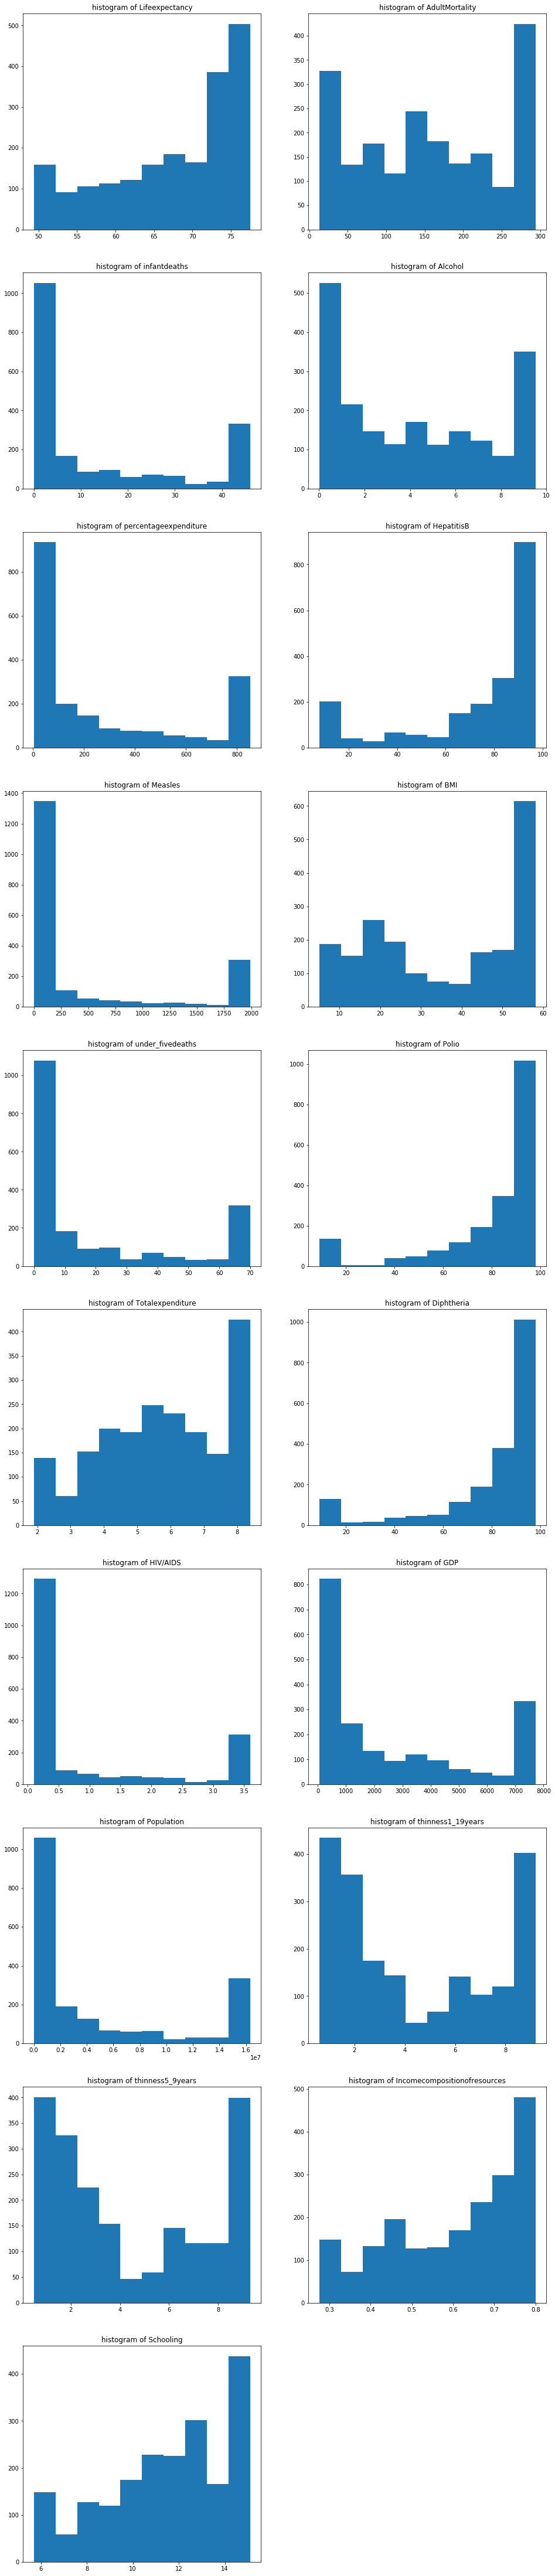

In [20]:
# plot histogram on each column after winzorization
# check out if they are normally distributed
plt.figure(figsize=(16,80))
win_list = ['Lifeexpectancy','AdultMortality','infantdeaths','Alcohol','percentageexpenditure',
              'HepatitisB','Measles','BMI','under_fivedeaths','Polio','Totalexpenditure','Diphtheria',
               'HIV/AIDS','GDP','Population', 'thinness1_19years','thinness5_9years','Incomecompositionofresources',
               'Schooling']
for j,win_var in enumerate(win_list):
    print(i,j)
    plt.subplot(10,2, j+1) #???
    plt.hist(lifeexp_win[win_var])
    plt.title("histogram of {}".format(win_var))
plt.tight_layout
plt.show()

#why the last plot can't show???


In [21]:
# check out correlation between all variables
corlife=lifeexp_win.corr()
print(corlife)


                                  Year  Lifeexpectancy  AdultMortality  \
Year                          1.000000        0.152146       -0.036393   
Lifeexpectancy                0.152146        1.000000       -0.577109   
AdultMortality               -0.036393       -0.577109        1.000000   
infantdeaths                 -0.043136       -0.552717        0.300582   
Alcohol                      -0.050451        0.353894       -0.220040   
percentageexpenditure         0.198320        0.531039       -0.330639   
HepatitisB                    0.247451        0.269086       -0.093703   
Measles                      -0.142211       -0.295012        0.130558   
BMI                           0.080045        0.610166       -0.375582   
under_fivedeaths             -0.048774       -0.578218        0.311290   
Polio                         0.117847        0.421117       -0.211319   
Totalexpenditure              0.050505        0.213006       -0.163774   
Diphtheria                    0.166411

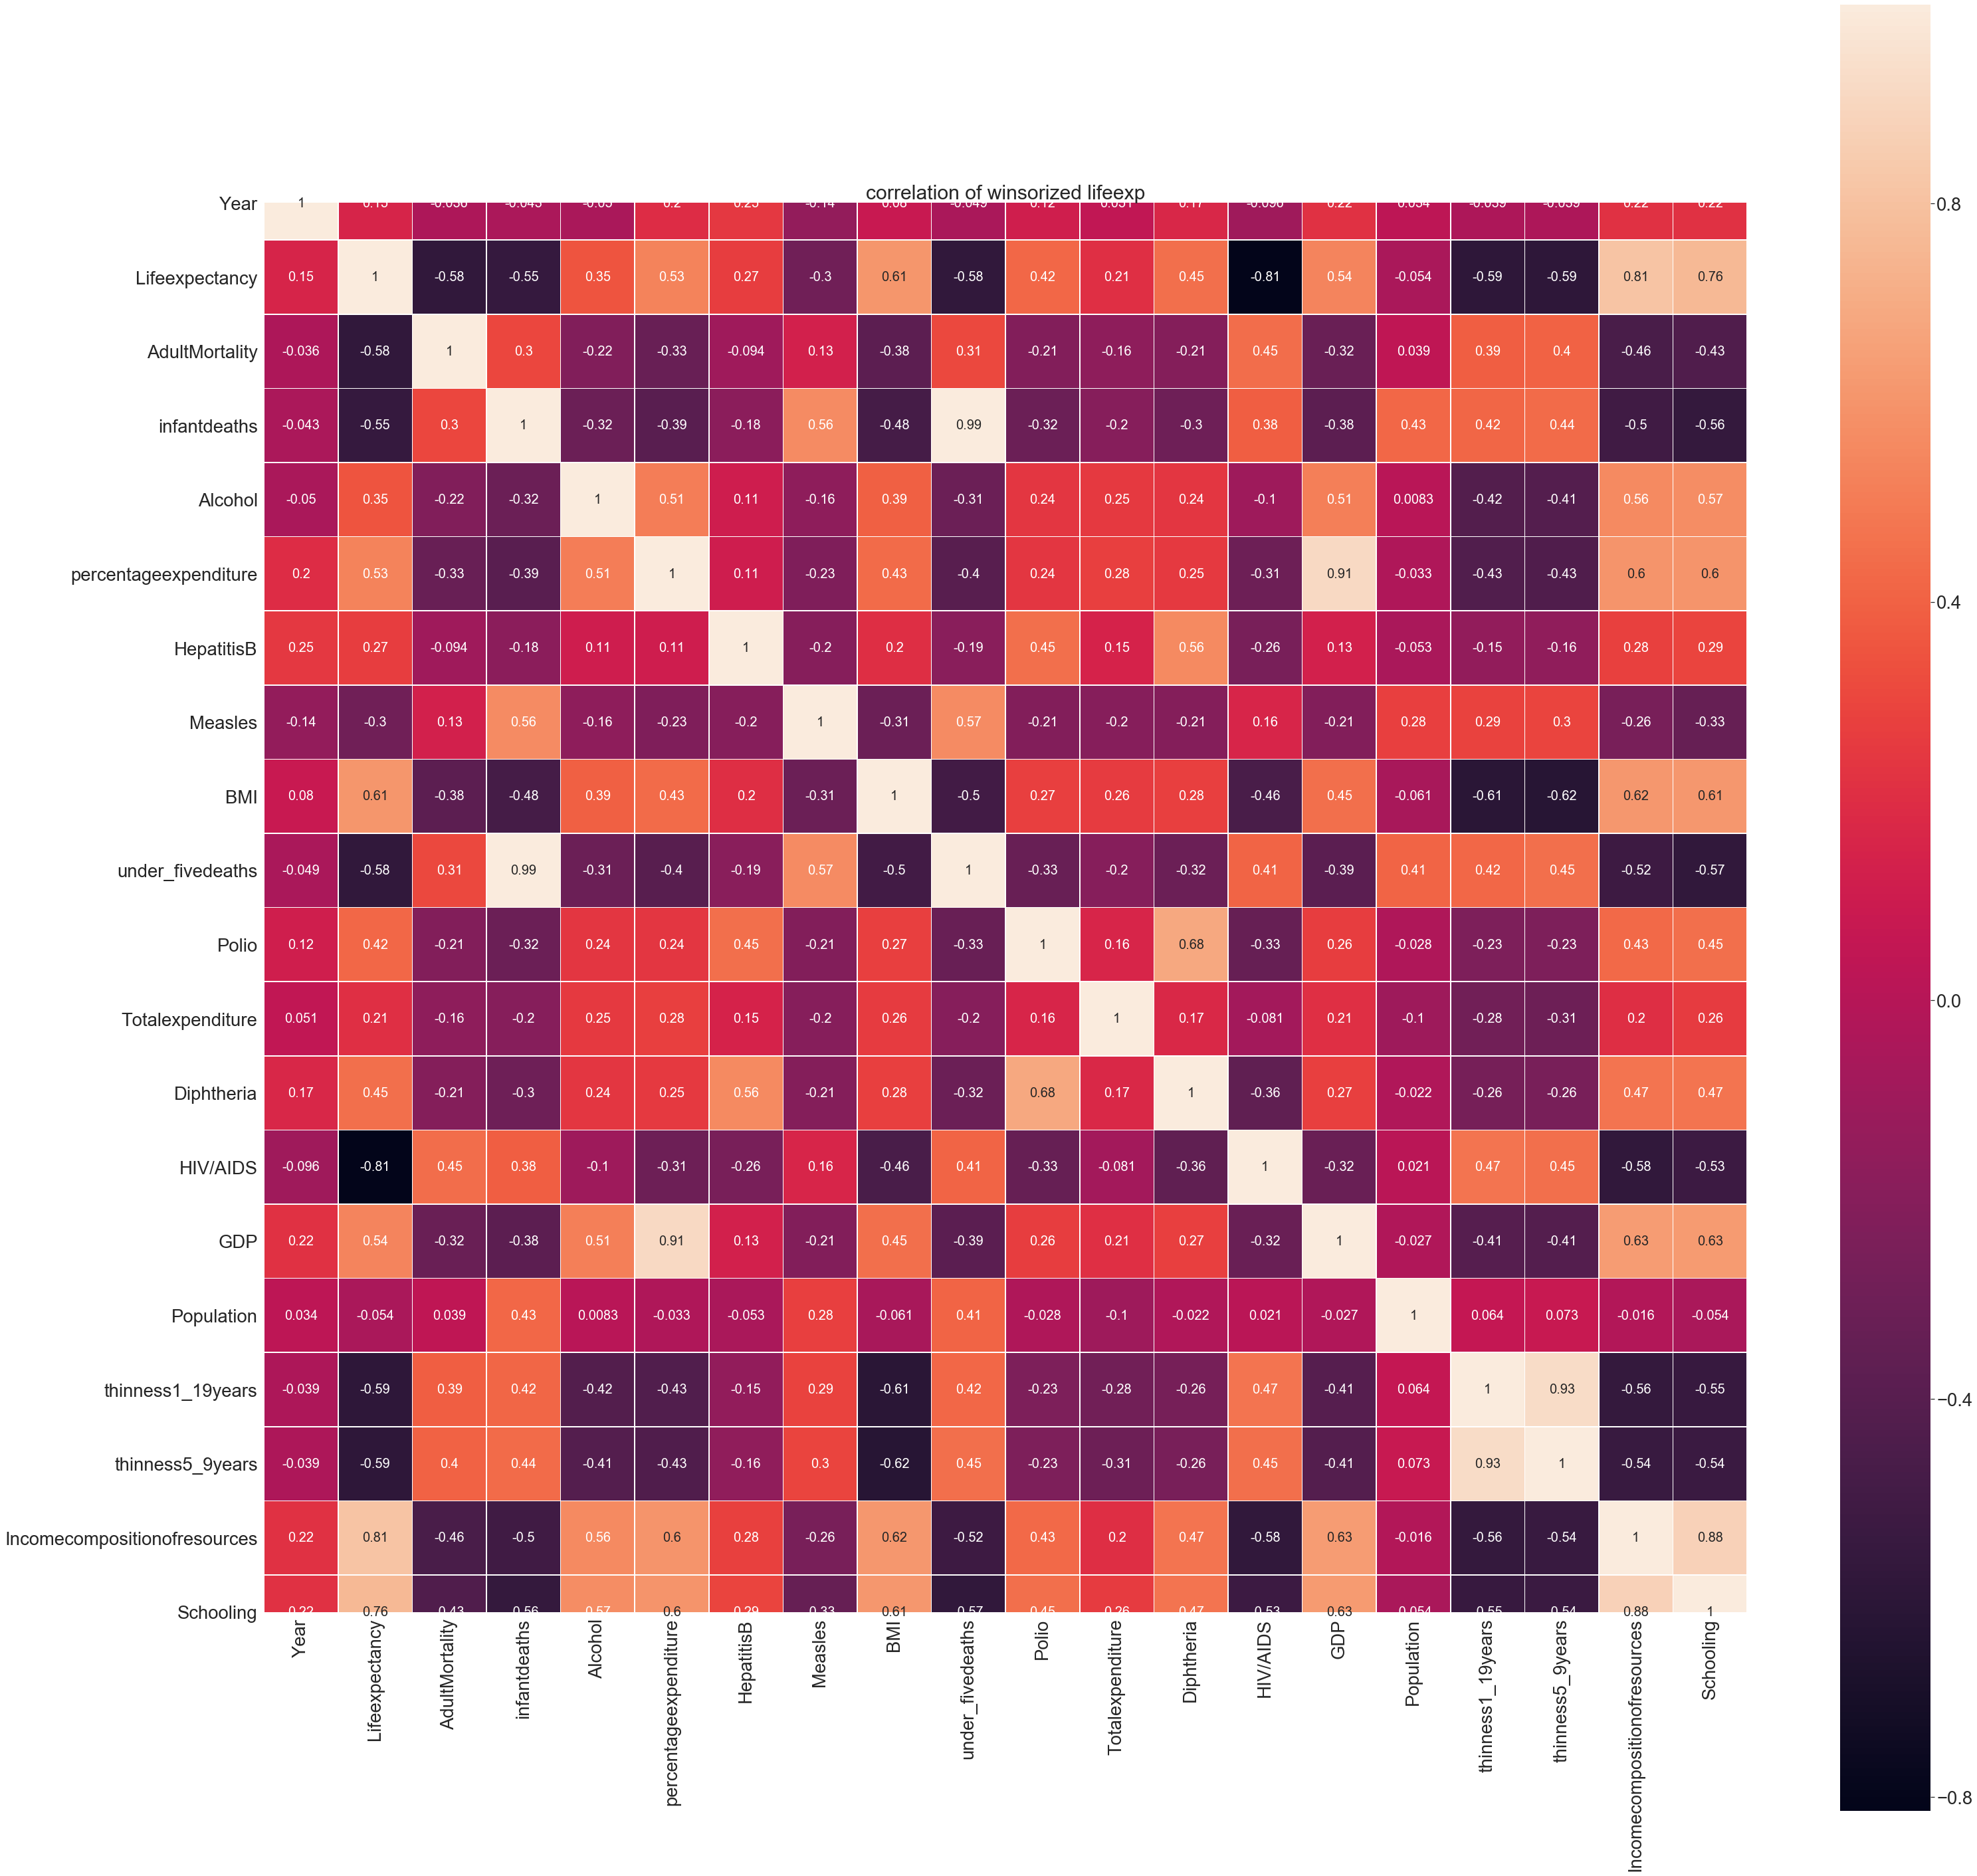

In [43]:
plt.figure(figsize=(50,50))
sns.set(font_scale=2.5)
sns.heatmap(corlife, square=True, annot=True,linewidths=0.5, annot_kws={"size": 20})
plt.title('correlation of winsorized lifeexp')
plt.show()

From the plot above we can see that life-expentancy has negative correlation with adultmortality, infantdeath,under5death,thinness1_19years,thinness5-9years, has strong negative correlation with HIV/AID column, life_expentancy has positive correlation with percentageexpenditure,BMI, has some positive correlation with GDP,has strong correlation with Incomecompositionofresources and schooling.
Between the features among themselves, there are some features have high correlation values with each other, which needs to be studied further.

Looks like feature income_composition resource has strong positive realtionship with Schooling. 
Feature thinness1-19years has strong positive relationship with thiness5-9years. 
Feature GDP has strong positive realtionship with percentage expenditure. 
Feature underfivedeath has strong positive relationship with Infantdeath. 


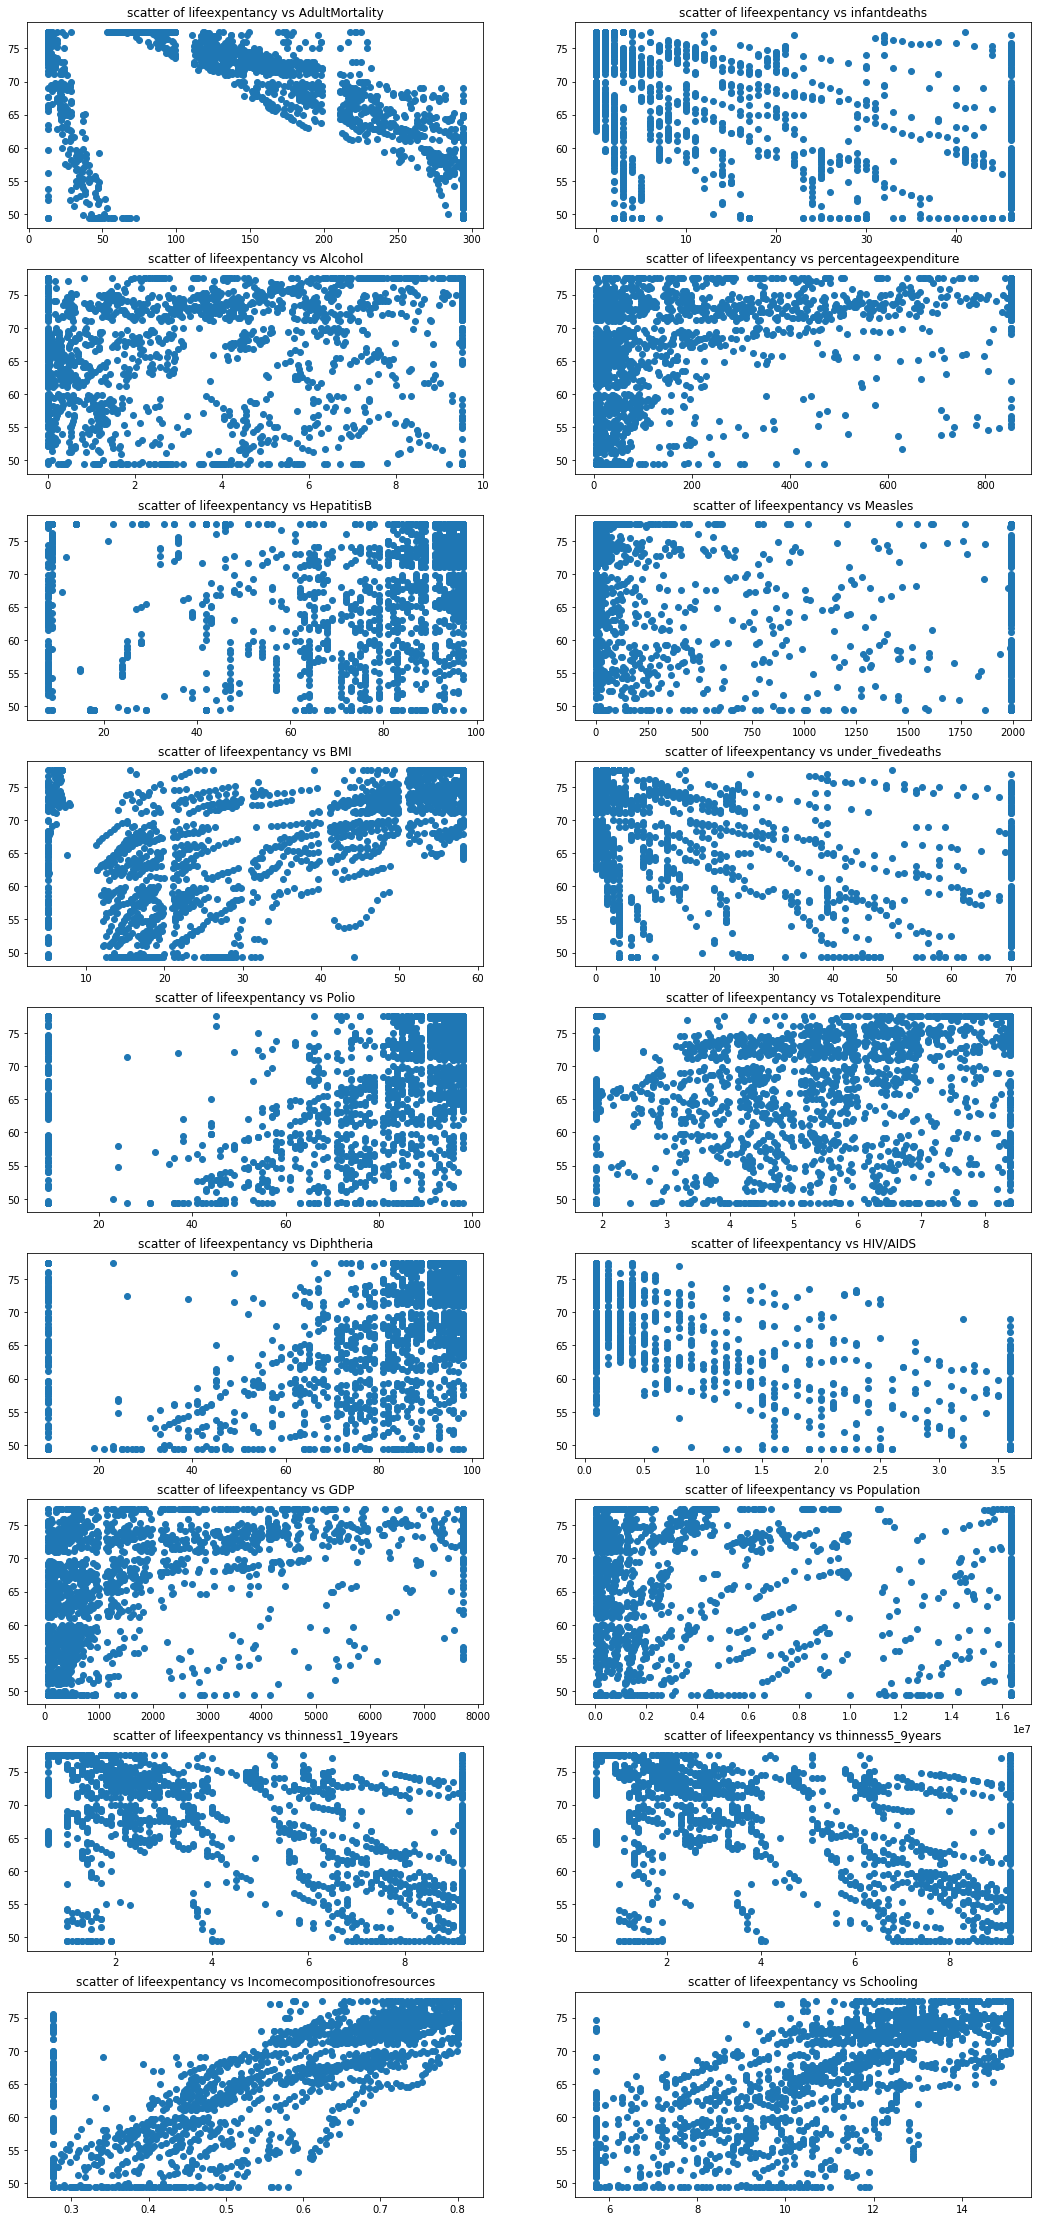

In [23]:
# plot scatterplot for all variable vs. life expentancy
plt.figure(figsize=(18,40))
new_list = ['AdultMortality','infantdeaths','Alcohol','percentageexpenditure',
              'HepatitisB','Measles','BMI','under_fivedeaths','Polio','Totalexpenditure','Diphtheria',
               'HIV/AIDS','GDP','Population', 'thinness1_19years','thinness5_9years','Incomecompositionofresources',
               'Schooling']

for j,new_var in enumerate(new_list):
    plt.subplot(9,2, j+1) 
    plt.scatter(lifeexp_win[new_var],lifeexp_win['Lifeexpectancy'])
    plt.title("scatter of lifeexpentancy vs {}".format(new_var))
plt.tight_layout
plt.show()

#from the plot below it's clear to see,adultMortality has some negtive relationship with life_expentancy.
# life_expentancy has some pattern with under_fivedeaths
# column BMI, most of the data points goes up according to the life_expentancy
# For feature GDP, the higher the GDP in plot the less data points have lower values of life_expentancy 
# feature Population feature, bigger population, the less data points with high values of life_expentancy
# income composition of resources  has strong positive relationship with life_expentancy
# schooling has positive relationship with life_expentancy

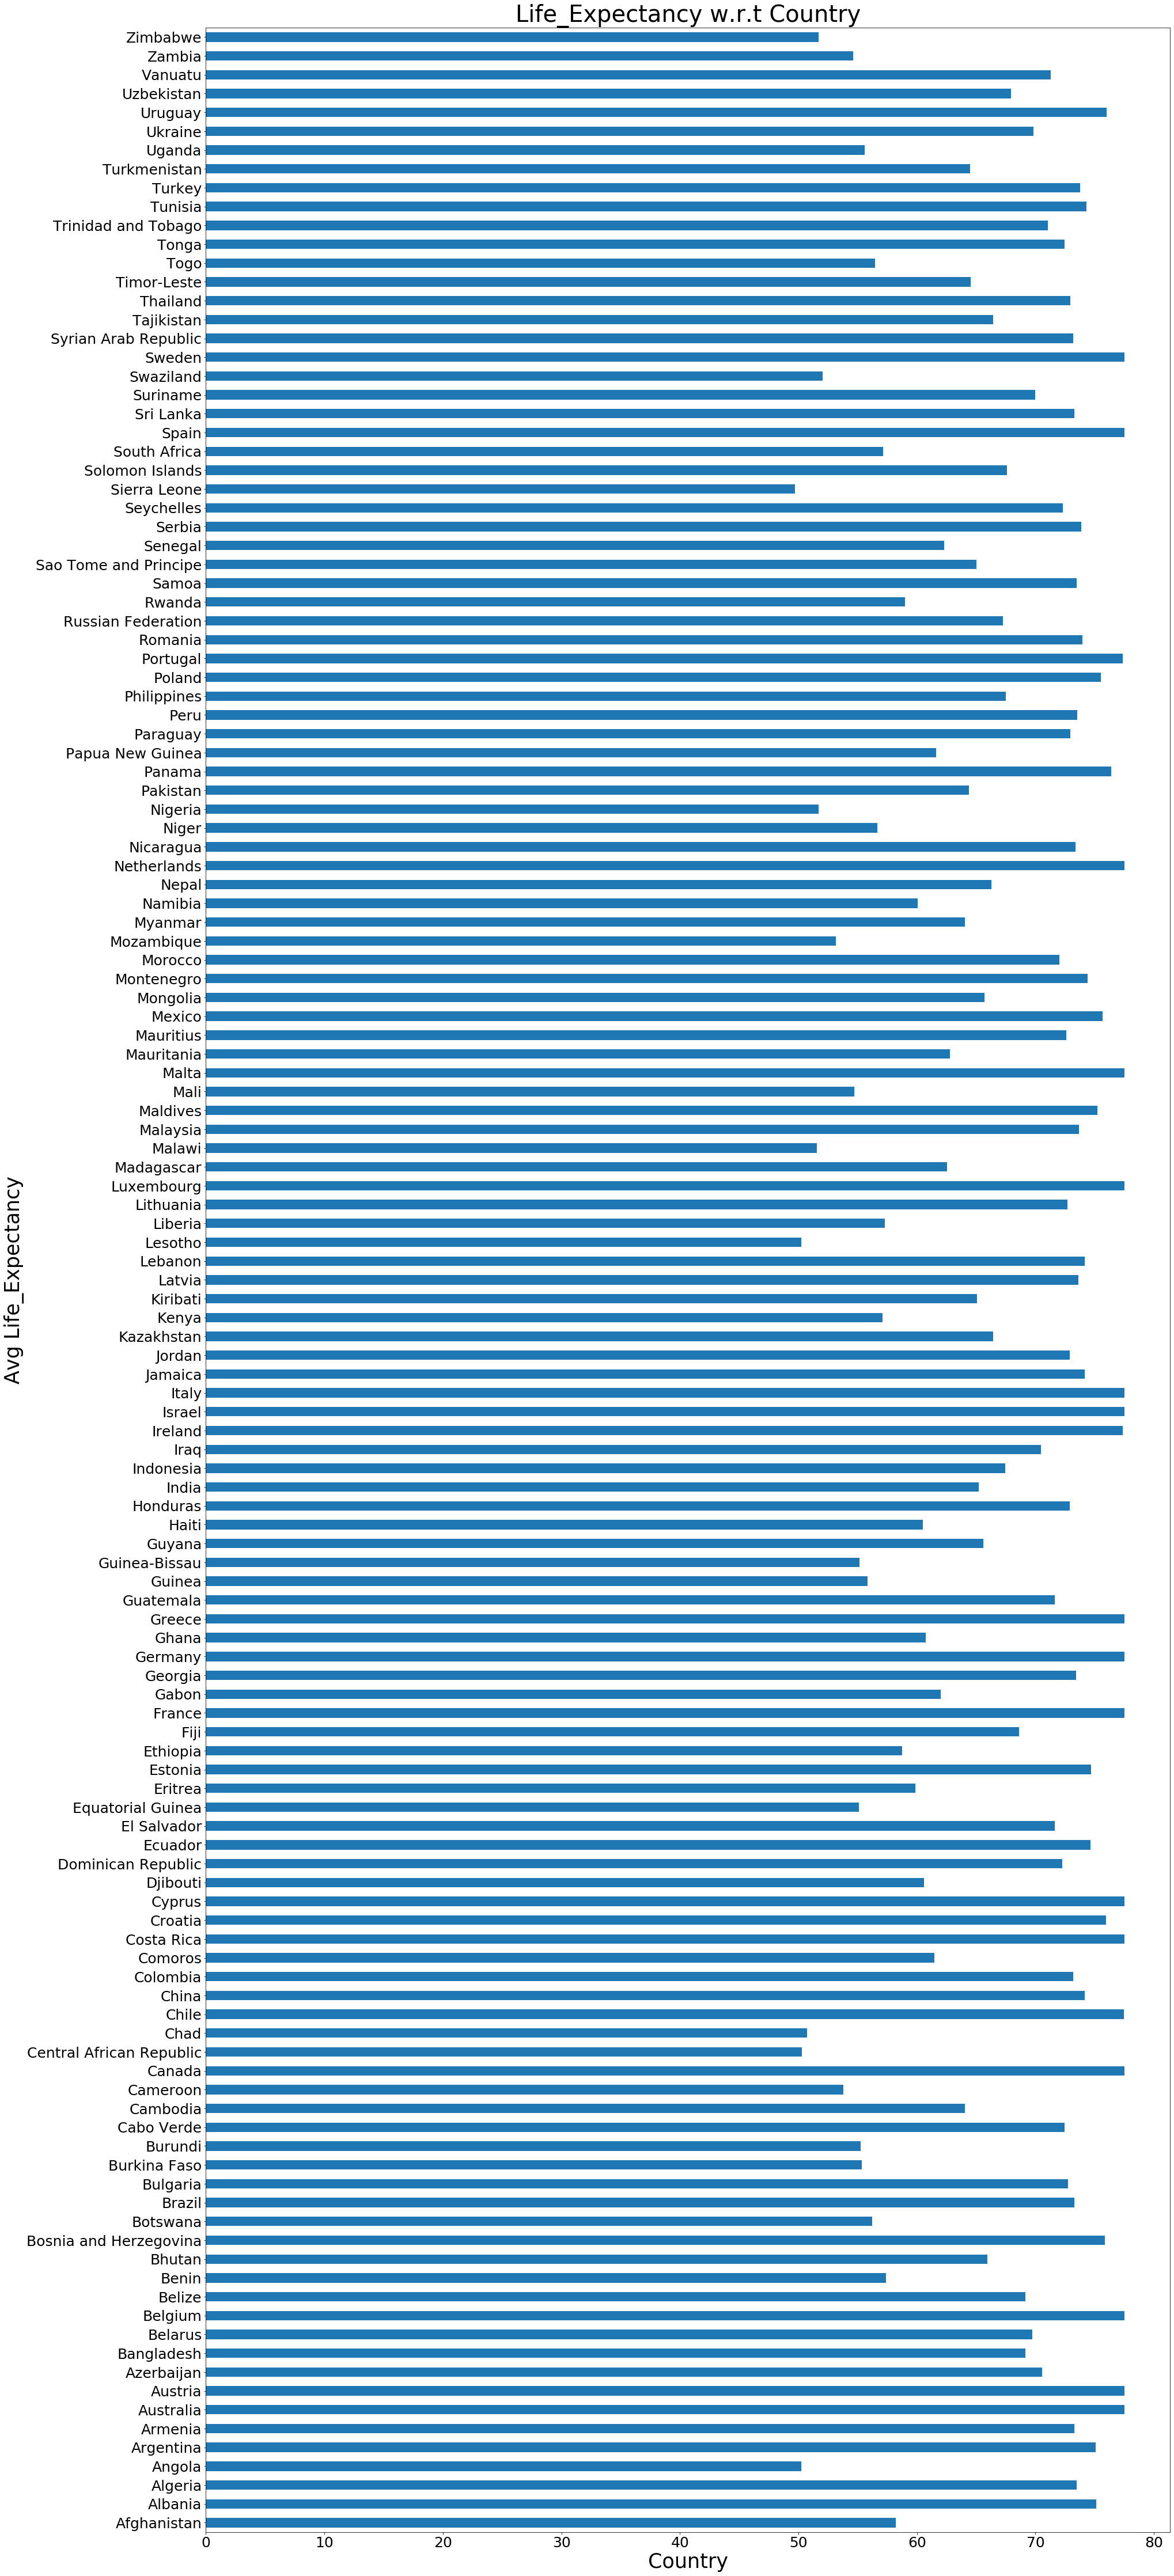

In [24]:
# let check out the categorical variable vs life_expentancy

#firstly check out column Country

lifeexp_country=lifeexp_win.groupby("Country").mean()["Lifeexpectancy"]
lifeexp_country.plot(kind='barh', figsize=(30,80), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

In [25]:
print(lifeexp_country)

Country
Afghanistan                 58.193750
Albania                     75.137500
Algeria                     73.486667
Angola                      50.226667
Argentina                   75.080000
Armenia                     73.306667
Australia                   77.500000
Austria                     77.500000
Azerbaijan                  70.566667
Bangladesh                  69.133333
Belarus                     69.746667
Belgium                     77.500000
Belize                      69.153333
Benin                       57.406667
Bhutan                      65.920000
Bosnia and Herzegovina      75.873333
Botswana                    56.206667
Brazil                      73.273333
Bulgaria                    72.740000
Burkina Faso                55.360000
Burundi                     55.266667
Cabo Verde                  72.466667
Cambodia                    64.053333
Cameroon                    53.800000
Canada                      77.500000
Central African Republic    50.273333
Chad

In [26]:
type(lifeexp_country)

pandas.core.series.Series

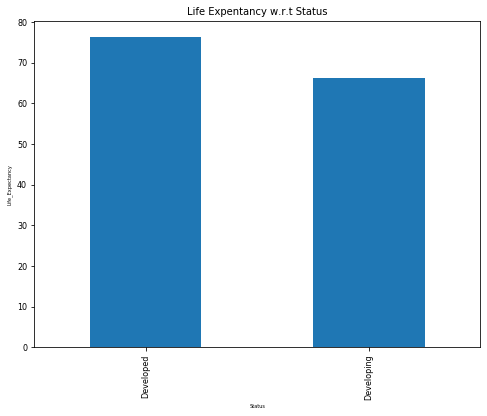

In [27]:
# check out column status
lifeexp_country=lifeexp_win.groupby("Status").mean()["Lifeexpectancy"]
lifeexp_country.plot(kind='bar', figsize=(8,6), fontsize=8)
plt.title("Life Expentancy w.r.t Status",fontsize=10)
plt.xlabel("Status",fontsize=5)
plt.ylabel("Life_Expectancy",fontsize=5)
plt.show()

In [30]:
# let's use statistic test to show if the two groups developing country and developed country are different
ttest_ind(lifeexp_win[lifeexp_win.Status == "Developed"]["Lifeexpectancy"],
          lifeexp_win[lifeexp_win.Status== "Developing"]["Lifeexpectancy"])

# Since the p-value is quite small here, so it indicates two groups Developed and Developing are siginificantly different
# From the plot we also can see Developed countries have higher Life Expentancy

Ttest_indResult(statistic=20.201021873350392, pvalue=1.1170986964055117e-82)

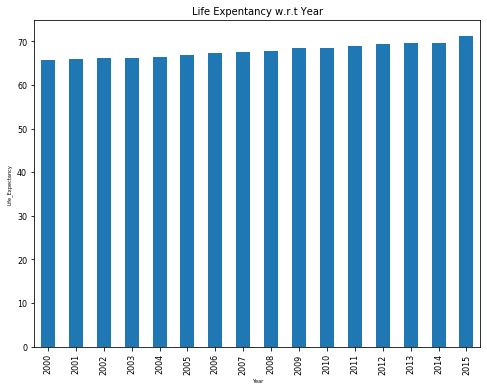

In [29]:
# check out column Year
lifeexp_country=lifeexp_win.groupby("Year").mean()["Lifeexpectancy"]
lifeexp_country.plot(kind='bar', figsize=(8,6), fontsize=8)
plt.title("Life Expentancy w.r.t Year",fontsize=10)
plt.xlabel("Year",fontsize=5)
plt.ylabel("Life_Expectancy",fontsize=5)
plt.show()

In [32]:
# apply PCA to columns with continious data exclude variable Life_expectancy
life_con = lifeexp_win.loc[:,"AdultMortality":"Schooling"]

life_con = life_con.dropna()
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(life_con)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00050352  0.30073322 -0.22015031 -0.33080551 -0.09375041  0.13062418
  -0.37577077  0.31144691 -0.21142582 -0.16385626 -0.21023827  0.44735719
  -0.32102125  0.03935437  0.38929152  0.4004825  -0.46311009 -0.43236986]
 [ 0.30073322  1.00050352 -0.31767254 -0.39481426 -0.17891131  0.56494289
  -0.48101927  0.99541256 -0.31722799 -0.20015611 -0.3022507   0.3846684
  -0.37944718  0.42555623  0.41722673  0.43989625 -0.50284597 -0.55923397]
 [-0.22015031 -0.31767254  1.00050352  0.50880184  0.10852028 -0.16181147
   0.39244628 -0.31125939  0.23702283  0.25415633  0.24180248 -0.10158204
   0.51496317  0.00833002 -0.42392021 -0.41151947  0.55638555  0.57487399]
 [-0.33080551 -0.39481426  0.50880184  1.00050352  0.11152097 -0.23031948
   0.4337001  -0.3996017   0.24212161  0.27643389  0.25488015 -0.30588096
   0.91179815 -0.03258035 -0.43061478 -0.4338153   0.59894672  0.60017228]
 [-0.09375041 -0.17891131  0.10852028  0.11152097  1.00050352 -0.20021116
   0.20413634 -

In [33]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[-0.19638189 -0.27001084  0.2183102   0.2594336   0.13476662 -0.17682348
  0.27375626 -0.2749671   0.19445148  0.13547303  0.20227192 -0.22811735
  0.26034032 -0.06512644 -0.27232683 -0.27333209  0.31651612  0.3215526 ]
Eigenvalue 1: 7.286405603515678
----------------------------------------
Eigenvector 2: 
[-0.11334521  0.409717    0.21974088  0.23182909 -0.10705028  0.39938772
  0.05604644  0.39979956 -0.06341917  0.00094238 -0.04567322 -0.04052441
  0.24399481  0.5070216  -0.11851942 -0.09940935  0.15858297  0.09934642]
Eigenvalue 2: 1.8137897909228295
----------------------------------------
Eigenvector 3: 
[ 0.04458817  0.14140803 -0.10743168 -0.15460847  0.51595562  0.0824993
 -0.10010093  0.12974897  0.4883988  -0.05282688  0.52524339 -0.12965058
 -0.12160015  0.17024463  0.16834267  0.17737042  0.05547658  0.0451445 ]
Eigenvalue 3: 1.7140487528836503
----------------------------------------
Eigenvector 4: 
[-0.28800451  0.05629333 -0.32439954 -0.38689223 -0.0118

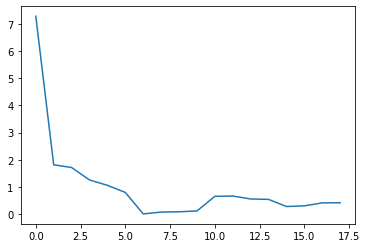

[7.28640560e+00 1.81378979e+00 1.71404875e+00 1.25530957e+00
 1.05774612e+00 7.96288826e-01 4.28533071e-03 7.14345417e-02
 8.29508411e-02 1.12381024e-01 6.52112686e-01 6.63773897e-01
 5.54602934e-01 5.40137030e-01 2.76430763e-01 3.01602313e-01
 4.10683858e-01 4.15079556e-01]


In [34]:
# plot the elbow plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)
# according to the rule of eig__val_cov >1 and elbow plot result, we can set n_component=5

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.40459659 0.10071539 0.09517701 0.06970432 0.0587341 ]


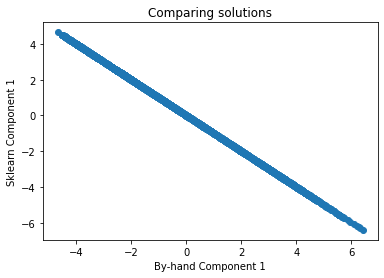

In [35]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In [47]:
sum([0.40459659, 0.10071539,0.09517701, 0.06970432, 0.0587341])

0.72892741

According to previous heatmp result and scatterplot result, it's obvious that within features, there are some strong relationships, so if we use PCA and use components to replace features, it probably will affect result of modelling. So we will extract features from datset instead of using PCA components. Another thing, first 5 components from PCA explained 72% of the variance. 
So it's better choose Year, Status, Country, adultmorality,HIV/AIDS, income_composition_resource, schooling, thiness1_19years, GDP, percentage_expenditure, under5death,BMI,Population. 


In [48]:
# Question about weather use PCA or hand-picked variables to form new dataset????

newdata = lifeexp_win[['Lifeexpectancy','AdultMortality','infantdeaths','percentageexpenditure', 'Measles','BMI',
                       'under_fivedeaths', 'HIV/AIDS','GDP','Population', 'thinness1_19years','thinness5_9years',
                       'Incomecompositionofresources','Schooling']]

In [49]:
newdata.head()

,Lifeexpectancy,AdultMortality,infantdeaths,percentageexpenditure,Measles,BMI,under_fivedeaths,HIV/AIDS,GDP,Population,thinness1_19years,thinness5_9years,Incomecompositionofresources,Schooling
0,65.0,263.0,46,71.279624,1154,19.1,70,0.1,584.259210,16321581.0,9.2,9.3,0.479,10.1
1,59.9,271.0,46,73.523582,492,18.6,70,0.1,612.696514,327582.0,9.2,9.3,0.476,10.0
2,59.9,268.0,46,73.219243,430,18.1,70,0.1,631.744976,16321581.0,9.2,9.3,0.470,9.9
3,59.5,272.0,46,78.184215,1990,17.6,70,0.1,669.959000,3696958.0,9.2,9.3,0.463,9.8
4,59.2,275.0,46,7.097109,1990,17.2,70,0.1,63.537231,2978599.0,9.2,9.3,0.454,9.5
